# Import

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# Setting

In [53]:
pd.set_option("display.max_rows", None)  # 모든 행 출력
pd.set_option("display.max_columns", None)  # 모든 열 출력
rc('font', family='AppleGothic')
pd.options.display.float_format = '{:.4f}'.format


# plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'Malgun Gothic' (Windows 사용자)
plt.rcParams['axes.unicode_minus'] = False   # 음수 기호 깨짐 방지

# Data

In [3]:
file_path = '/Users/toad/Documents/ToyProject/LG_Aimers_Infertility/'


In [59]:
train = pd.read_csv(file_path + 'Data/train.csv').drop(columns=['ID'])
test = pd.read_csv(file_path + 'Data/test.csv').drop(columns=['ID'])

In [5]:
categorical_columns = [
    "시술 시기 코드","시술 당시 나이","시술 유형","특정 시술 유형","배란 자극 여부","배란 유도 유형","단일 배아 이식 여부","착상 전 유전 검사 사용 여부","착상 전 유전 진단 사용 여부","남성 주 불임 원인","남성 부 불임 원인","여성 주 불임 원인",
    "여성 부 불임 원인","부부 주 불임 원인","부부 부 불임 원인","불명확 불임 원인","불임 원인 - 난관 질환","불임 원인 - 남성 요인","불임 원인 - 배란 장애","불임 원인 - 여성 요인","불임 원인 - 자궁경부 문제","불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도","불임 원인 - 정자 면역학적 요인","불임 원인 - 정자 운동성","불임 원인 - 정자 형태","배아 생성 주요 이유","총 시술 횟수","클리닉 내 총 시술 횟수","IVF 시술 횟수","DI 시술 횟수","총 임신 횟수","IVF 임신 횟수",
    "DI 임신 횟수","총 출산 횟수","IVF 출산 횟수","DI 출산 횟수","난자 출처","정자 출처","난자 기증자 나이","정자 기증자 나이","동결 배아 사용 여부","신선 배아 사용 여부","기증 배아 사용 여부","대리모 여부","PGD 시술 여부","PGS 시술 여부"
]

In [6]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수","총 생성 배아 수","미세주입된 난자 수","미세주입에서 생성된 배아 수","이식된 배아 수","미세주입 배아 이식 수","저장된 배아 수","미세주입 후 저장된 배아 수","해동된 배아 수","해동 난자 수","수집된 신선 난자 수",
    "저장된 신선 난자 수","혼합된 난자 수","파트너 정자와 혼합된 난자 수","기증자 정자와 혼합된 난자 수","난자 채취 경과일","난자 해동 경과일","난자 혼합 경과일","배아 이식 경과일","배아 해동 경과일"
]

In [7]:
print(f'Columns : {train.columns.values}')
print(f'Shape : {train.shape}')
print(f'Null : {train.isnull().sum().to_string()}')

Columns : ['시술 시기 코드' '시술 당시 나이' '임신 시도 또는 마지막 임신 경과 연수' '시술 유형' '특정 시술 유형'
 '배란 자극 여부' '배란 유도 유형' '단일 배아 이식 여부' '착상 전 유전 검사 사용 여부' '착상 전 유전 진단 사용 여부'
 '남성 주 불임 원인' '남성 부 불임 원인' '여성 주 불임 원인' '여성 부 불임 원인' '부부 주 불임 원인'
 '부부 부 불임 원인' '불명확 불임 원인' '불임 원인 - 난관 질환' '불임 원인 - 남성 요인' '불임 원인 - 배란 장애'
 '불임 원인 - 여성 요인' '불임 원인 - 자궁경부 문제' '불임 원인 - 자궁내막증' '불임 원인 - 정자 농도'
 '불임 원인 - 정자 면역학적 요인' '불임 원인 - 정자 운동성' '불임 원인 - 정자 형태' '배아 생성 주요 이유'
 '총 시술 횟수' '클리닉 내 총 시술 횟수' 'IVF 시술 횟수' 'DI 시술 횟수' '총 임신 횟수' 'IVF 임신 횟수'
 'DI 임신 횟수' '총 출산 횟수' 'IVF 출산 횟수' 'DI 출산 횟수' '총 생성 배아 수' '미세주입된 난자 수'
 '미세주입에서 생성된 배아 수' '이식된 배아 수' '미세주입 배아 이식 수' '저장된 배아 수' '미세주입 후 저장된 배아 수'
 '해동된 배아 수' '해동 난자 수' '수집된 신선 난자 수' '저장된 신선 난자 수' '혼합된 난자 수'
 '파트너 정자와 혼합된 난자 수' '기증자 정자와 혼합된 난자 수' '난자 출처' '정자 출처' '난자 기증자 나이'
 '정자 기증자 나이' '동결 배아 사용 여부' '신선 배아 사용 여부' '기증 배아 사용 여부' '대리모 여부'
 'PGD 시술 여부' 'PGS 시술 여부' '난자 채취 경과일' '난자 해동 경과일' '난자 혼합 경과일' '배아 이식 경과일'
 '배아 해동 경과일' '임신 성공 여부']
Shape : (256351, 68)
Null : 시술 시기 코드                      0
시술 당시 나

In [8]:
for col in categorical_columns:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [9]:
print(f'Null : {train.isnull().sum().to_string()}')

Null : 시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
특정 시술 유형                      0
배란 자극 여부                      0
배란 유도 유형                      0
단일 배아 이식 여부                   0
착상 전 유전 검사 사용 여부              0
착상 전 유전 진단 사용 여부              0
남성 주 불임 원인                    0
남성 부 불임 원인                    0
여성 주 불임 원인                    0
여성 부 불임 원인                    0
부부 주 불임 원인                    0
부부 부 불임 원인                    0
불명확 불임 원인                     0
불임 원인 - 난관 질환                 0
불임 원인 - 남성 요인                 0
불임 원인 - 배란 장애                 0
불임 원인 - 여성 요인                 0
불임 원인 - 자궁경부 문제               0
불임 원인 - 자궁내막증                 0
불임 원인 - 정자 농도                 0
불임 원인 - 정자 면역학적 요인            0
불임 원인 - 정자 운동성                0
불임 원인 - 정자 형태                 0
배아 생성 주요 이유                   0
총 시술 횟수                       0
클리닉 내 총 시술 횟수                 0
IVF 시술 횟수                     0
D

In [10]:
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0000,5.0000,4.0000,2.0000,2.0000,2.0000,2.0000,0.0000,0.0000,7.0000,0.0000,5.0000,5.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,3.0000,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,nan,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,7.0000,7.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,2.0000,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,4.0000,4.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0000,6.0000,6.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,6.0000,6.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,3.0000,NaN,0


# EDA

### Target Distribution

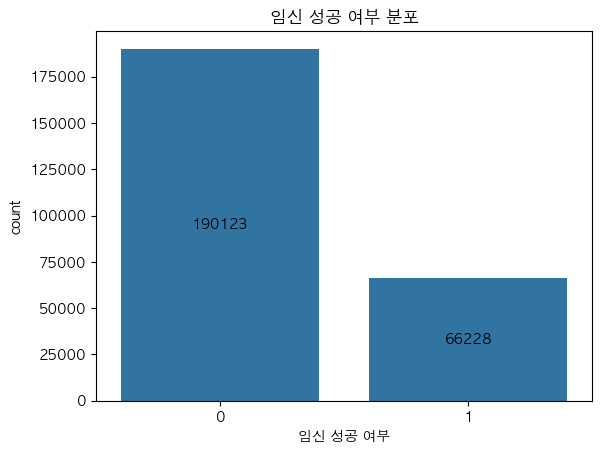

In [9]:
ax = sns.countplot(x=train['임신 성공 여부'], )
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='center', fontsize=10, fontweight='bold')
plt.title('임신 성공 여부 분포')
plt.show()

### Variable distribution

In [16]:
train.describe()

,임신 시도 또는 마지막 임신 경과 연수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,250060.0000,198863.0000,1436.0000,202616.0000,212785.0000,40369.0000,256351.0000
mean,9.2707,5.0611,4.1708,2.8436,1.3682,0.7247,1.1860,0.6129,0.4546,0.0464,8.5637,0.0934,7.6989,7.1073,0.5347,0.0000,0.0014,0.0054,3.2547,0.0456,0.2583
std,3.5503,4.6643,5.6259,4.0946,0.7720,0.8944,2.5023,1.8425,1.4153,0.6882,7.3172,1.1059,6.4519,6.5325,2.5095,0.0000,0.0373,0.1115,1.7157,0.4187,0.4377
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,7.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000
50%,9.0000,4.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,7.0000,6.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000
75%,11.0000,8.0000,7.0000,5.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,13.0000,0.0000,11.0000,11.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,1.0000
max,20.0000,51.0000,51.0000,43.0000,3.0000,3.0000,51.0000,51.0000,32.0000,36.0000,51.0000,51.0000,51.0000,51.0000,50.0000,0.0000,1.0000,7.0000,7.0000,7.0000,1.0000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256351 non-null  object 
 5   배란 자극 여부               256351 non-null  object 
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            256351 non-null  object 
 8   착상 전 유전 검사 사용 여부       256351 non-null  object 
 9   착상 전 유전 진단 사용 여부       256351 non-null  object 
 10  남성 주 불임 원인             256351 non-null  object 
 11  남성 부 불임 원인             256351 non-null  object 
 12  여성 주 불임 원인             256351 non-null  object 
 13  여성 부 불임 원인             256351 non-null  object 
 14  부부 주 불임 원인             256351 non-nu

In [18]:
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0000,5.0000,4.0000,2.0000,2.0000,2.0000,2.0000,0.0000,0.0000,7.0000,0.0000,5.0000,5.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,3.0000,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,nan,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,7.0000,7.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,2.0000,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,4.0000,4.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,nan,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0000,6.0000,6.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,6.0000,6.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,3.0000,NaN,0


In [114]:
col = "시술 당시 나이"
train[col].value_counts(), train[col].unique()

(시술 당시 나이
 만18-34세    102476
 만35-37세     57780
 만38-39세     39247
 만40-42세     37348
 만43-44세     12253
 만45-50세      6918
 알 수 없음        329
 Name: count, dtype: int64,
 array(['만18-34세', '만45-50세', '만35-37세', '만38-39세', '만40-42세', '만43-44세',
        '알 수 없음'], dtype=object))

In [51]:
train[train[col] == '1']

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
202447,TRXQMD,만35-37세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,nan,0.0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,"기증용, 현재 시술용",4회,4회,4회,0회,1회,1회,0회,1회,1회,0회,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.0000,0.0000,6.0000,6.0000,0.0000,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,nan,nan,0.0000,NaN,0.0000,2.0000,NaN,0


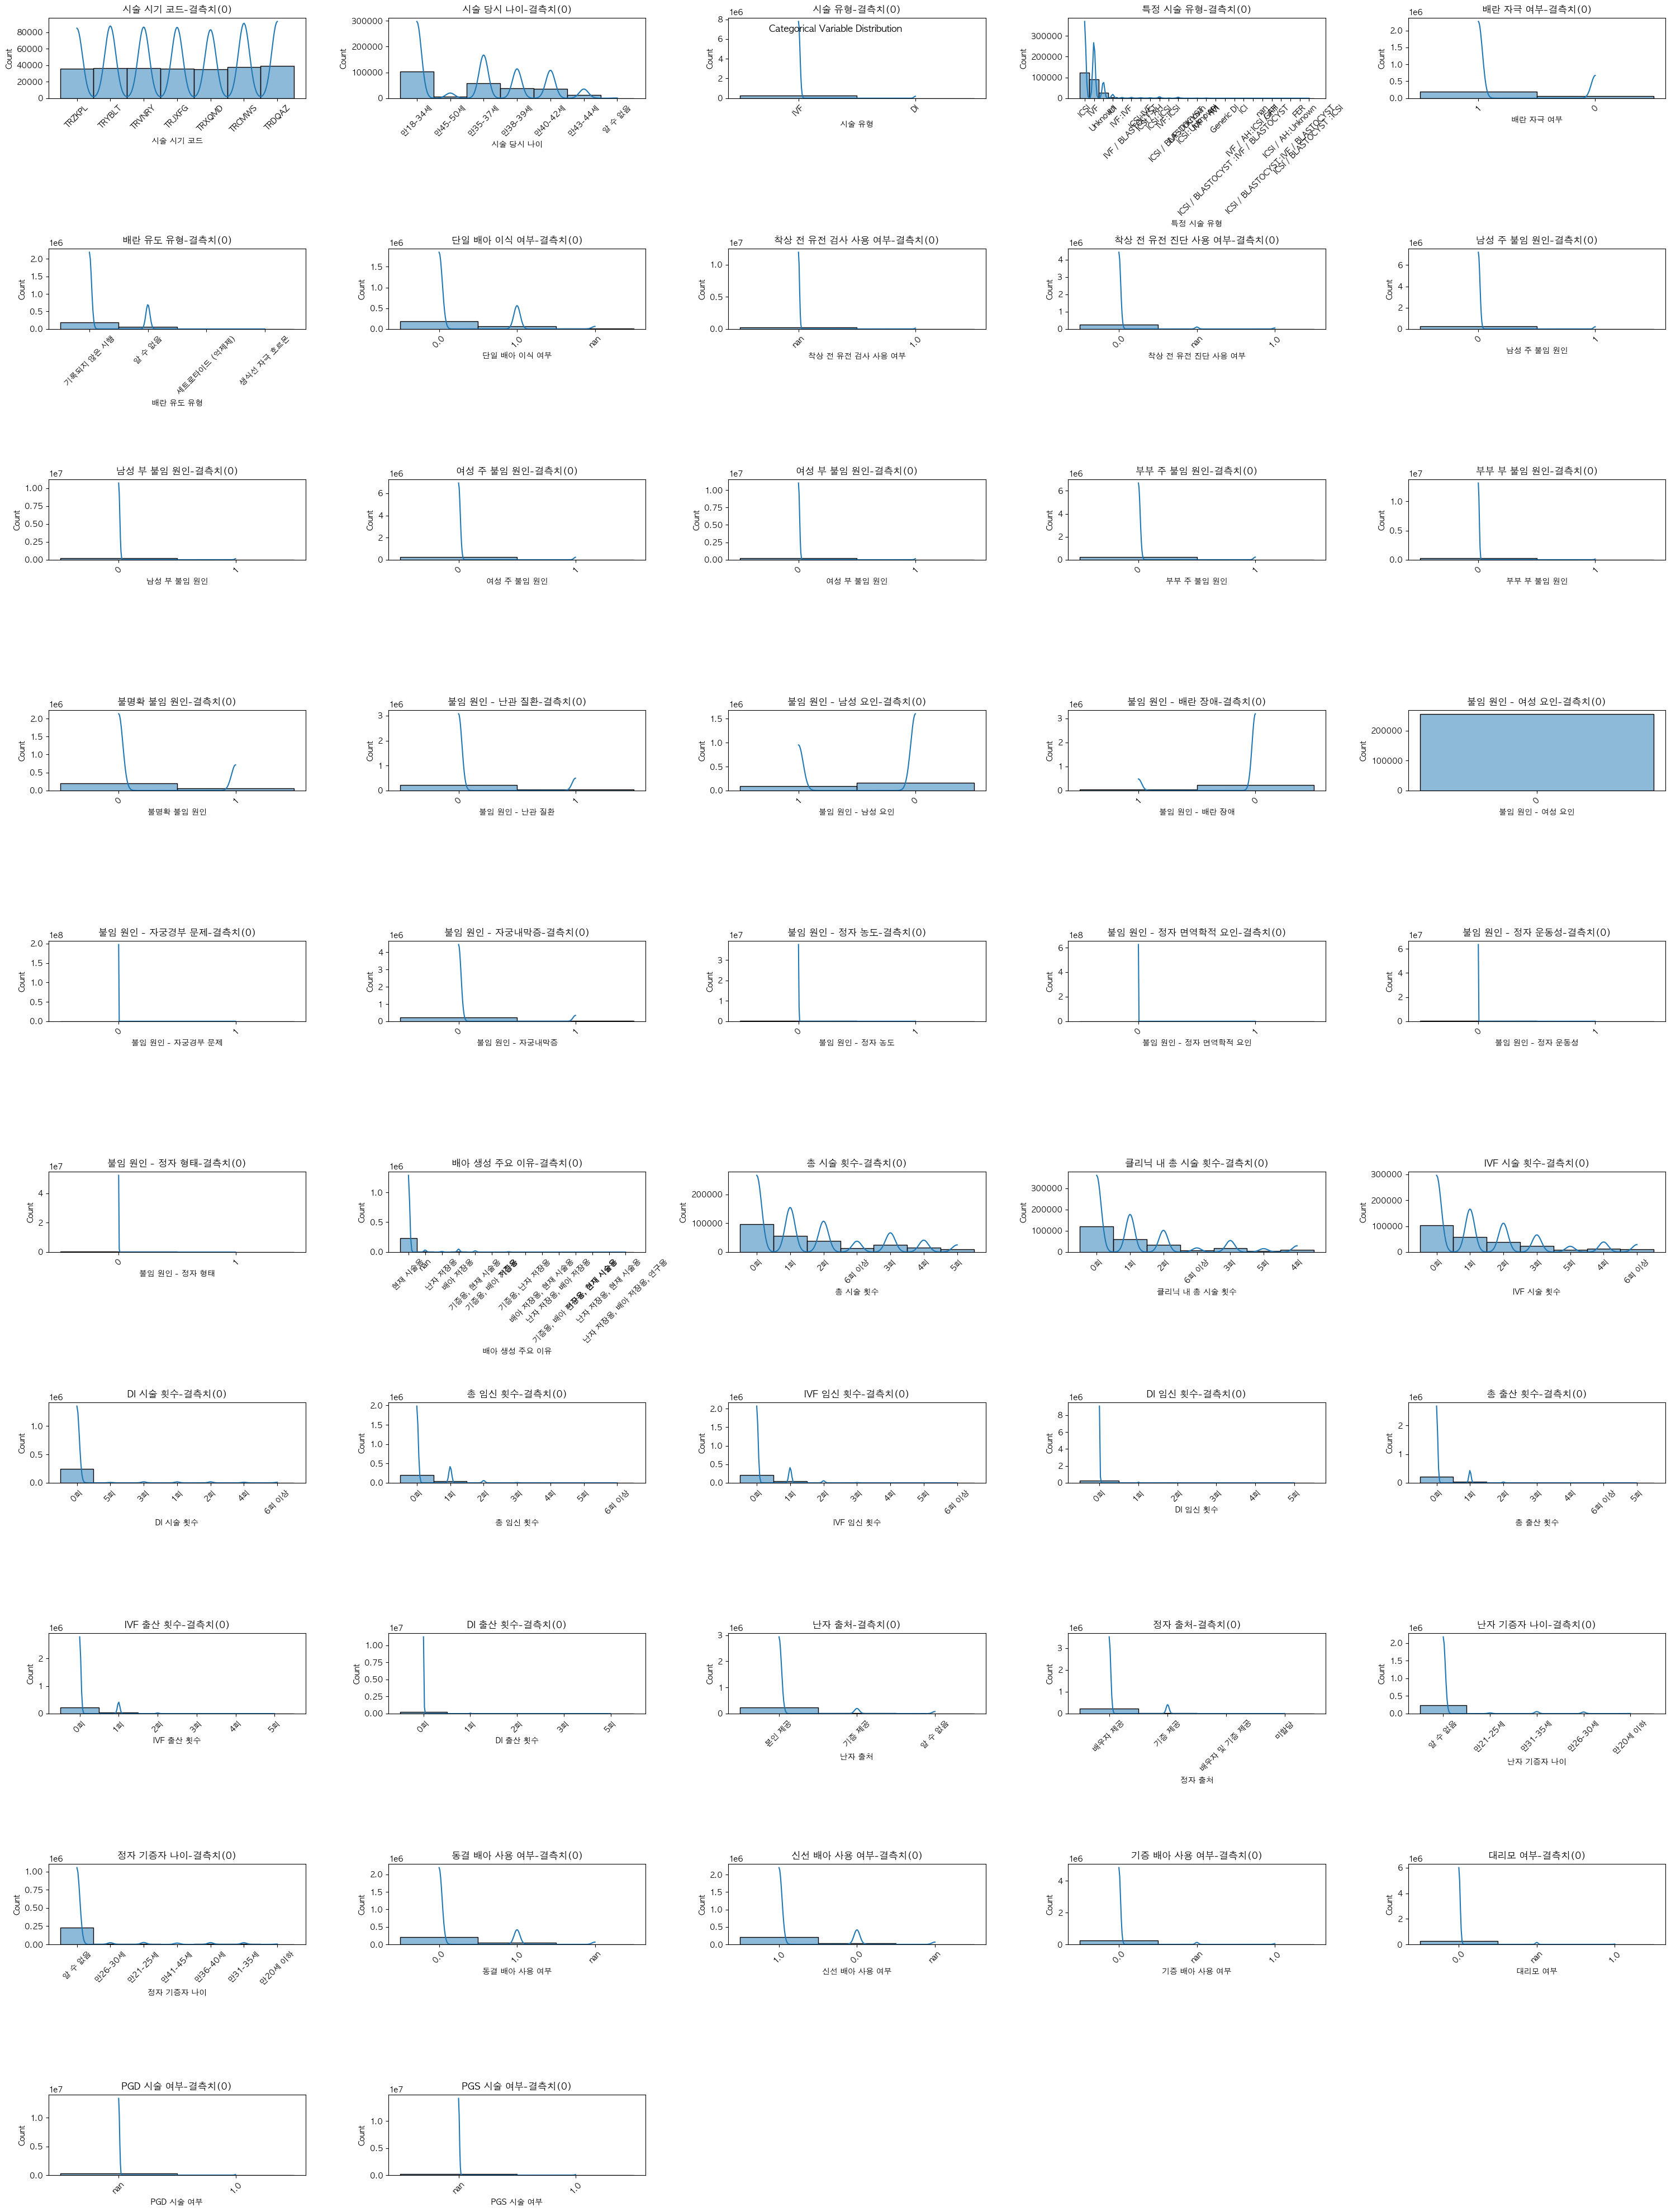

In [19]:
cat_col_len = len(categorical_columns)
cols = 5
rows = (cat_col_len // cols) + (cat_col_len % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(30, 4*rows))
fig.suptitle('Categorical Variable Distribution')

for i, col in enumerate(categorical_columns):
    r, c = divmod(i, cols)  # 현재 플롯 위치 계산
    sns.histplot(train[col], kde=True, ax=axes[r, c])  # 히스토그램 플롯
    axes[r, c].set_title(f'{col}-결측치({train[col].isnull().sum()})')  # 제목 추가
    axes[r, c].tick_params(axis='x', rotation=45)

# 빈 서브플롯 숨기기
for i in range(cat_col_len, rows * cols):
    r, c = divmod(i, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

In [86]:
col = "배아 이식 경과일"
train[col].value_counts(), train[col].unique()

(배아 이식 경과일
 5.0000    81459
 3.0000    57924
 2.0000    35078
 0.0000    24904
 1.0000     6053
 4.0000     4504
 6.0000     2773
 7.0000       90
 Name: count, dtype: int64,
 array([ 3., nan,  2.,  5.,  1.,  0.,  4.,  6.,  7.]))

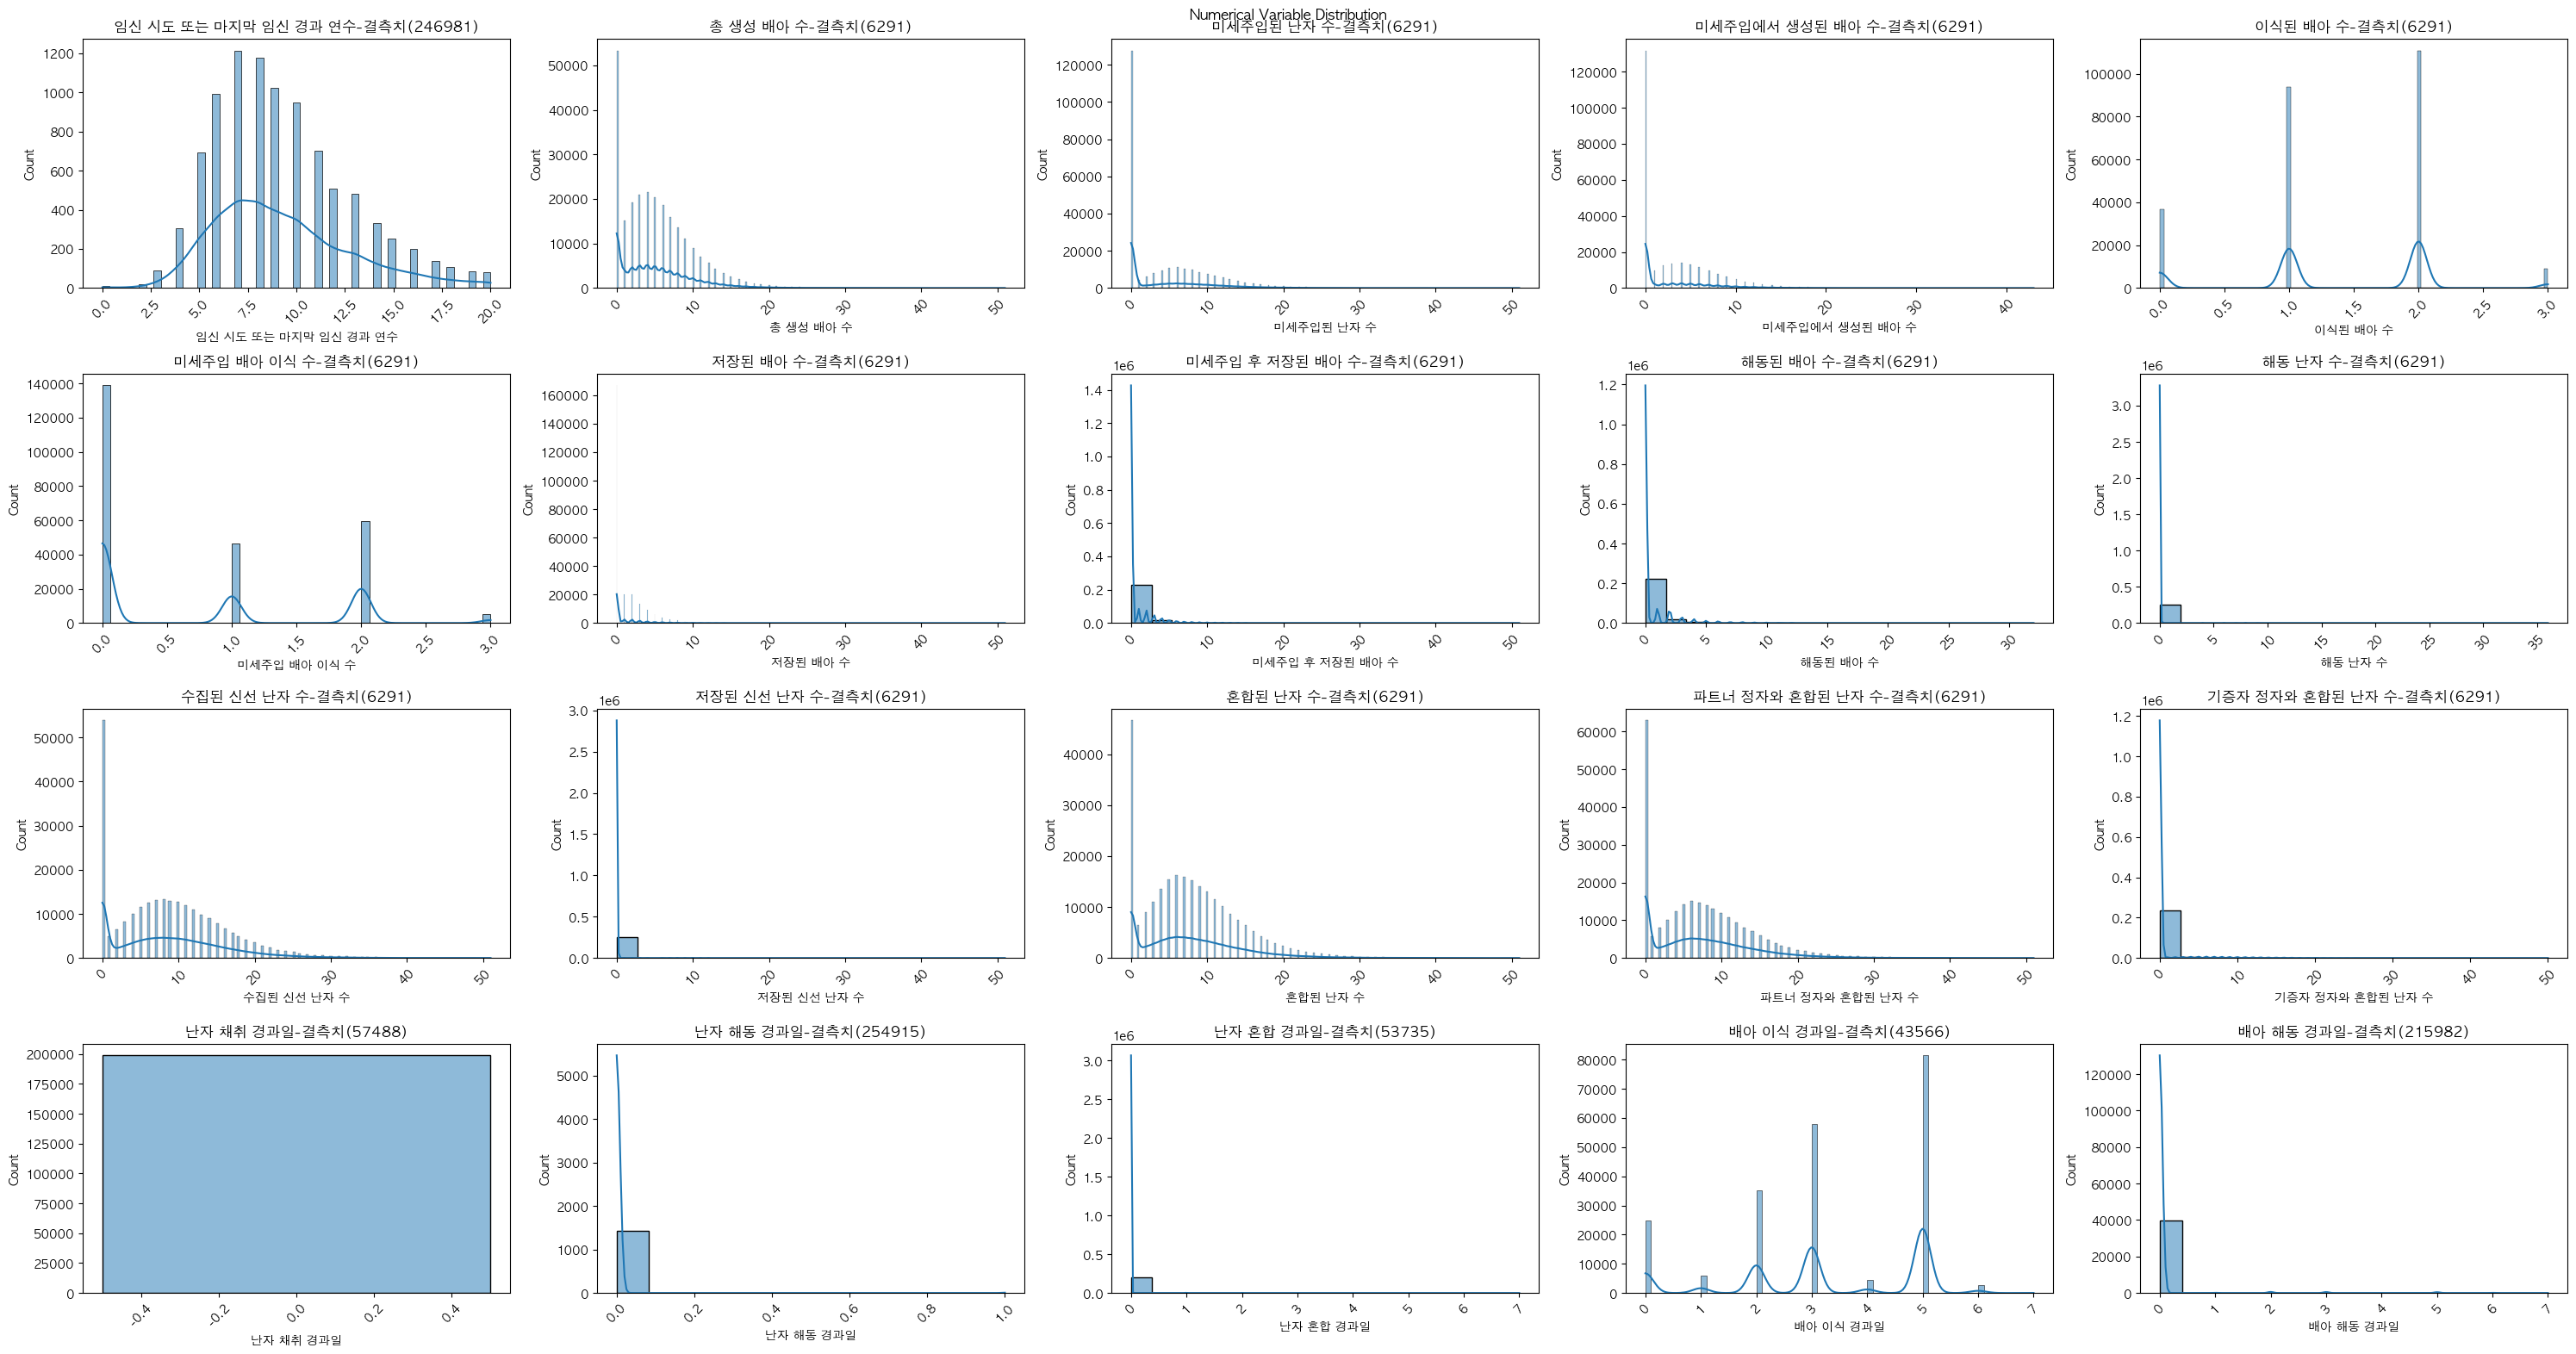

In [72]:
num_col_len = len(numeric_columns)
cols = 5
rows = (num_col_len // cols) + (num_col_len % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(30, 4*rows))
fig.suptitle('Numerical Variable Distribution')

for i, col in enumerate(numeric_columns):
    r, c = divmod(i, cols)  # 현재 플롯 위치 계산
    sns.histplot(train[col], kde=True, ax=axes[r, c])  # 히스토그램 플롯
    axes[r, c].set_title(f'{col}-결측치({train[col].isnull().sum()})')  # 제목 추가
    axes[r, c].tick_params(axis='x', rotation=45)

# 빈 서브플롯 숨기기
for i in range(num_col_len, rows * cols):
    r, c = divmod(i, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

# Preprocessing

### Categorical 변수 전처리
각 변수 마다 처리 조건은 feat_engineering.txt에 나와있음

In [60]:
def cat_preprocessing(df, eggcell_dist, sperm_dist):
    # 특정 범주 아닌 값은 'Others'로 변경
    df["특정 시술 유형"] = df["특정 시술 유형"].apply(lambda x: x if x in ["ICSI", "IVF"] else "Others")
    df["배란 유도 유형"] = df["배란 유도 유형"].apply(lambda x: x if x == "기록되지 않은 시행" else "Others")
    df["배아 생성 주요 이유"] = df["배아 생성 주요 이유"].apply(lambda x: x if x == "현재 시술용" else "Others")

    # 특정 값만 유지하고 나머지는 "Others"로 변경
    category_mappings = {
        "총 시술 횟수": ["0회", "1회", "2회", "3회"],
        "클리닉 내 총 시술 횟수": ["0회", "1회", "2회"],
        "IVF 시술 횟수": ["0회", "1회", "2회", "3회"],
        "DI 시술 횟수": ["0회"],
        "총 임신 횟수": ["0회"],
        "IVF 임신 횟수": ["0회"],
        "DI 임신 횟수": ["0회"],
        "총 출산 횟수": ["0회"],
        "IVF 출산 횟수": ["0회"],
        "DI 출산 횟수": ["0회"]
    }

    for col, allowed_values in category_mappings.items():
        df[col] = df[col].apply(lambda x: x if x in allowed_values else "Others")

    # 특정 값 치환
    df["난자 출처"] = df["난자 출처"].replace("알 수 없음", "본인 제공")
    df["시술 당시 나이"] = df["시술 당시 나이"].replace("알 수 없음", "만18-34세")
    df["정자 출처"] = df["정자 출처"].apply(lambda x: x if x in ["배우자 제공", "기증 제공", "배우자 및 기증 제공"] else "배우자 제공")

    # 난자 기증자 나이 & 정자 기증자 나이 랜덤 치환 (분포 기반)
    df.loc[df["난자 기증자 나이"] == "알 수 없음", "난자 기증자 나이"] = np.random.choice(
                                                                                eggcell_dist.index,  # 실제 train 데이터에서 등장한 값들
                                                                                size=df["난자 기증자 나이"].eq("알 수 없음").sum(),  # '알수 없음' 개수만큼 샘플링
                                                                                replace=True,
                                                                                p=eggcell_dist.values  # 실제 데이터의 분포 기반으로 샘플링 확률 적용
                                                                            )
    df.loc[df["정자 기증자 나이"] == "알 수 없음", "정자 기증자 나이"] = np.random.choice(
                                                                                sperm_dist.index,
                                                                                size=df["정자 기증자 나이"].eq("알 수 없음").sum(),
                                                                                replace=True,
                                                                                p=sperm_dist.values
                                                                            )

    # 불필요한 컬럼 제거
    drop_columns = ["불임 원인 - 여성 요인", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"]
    df.drop(columns=drop_columns, inplace=True)

    # Binary Feature 결측치 처리 (NaN → 0.0)
    binary_columns = [
        "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
        "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부",
        "대리모 여부", "PGS 시술 여부", "PGD 시술 여부"
    ]
    df[binary_columns] = df[binary_columns].fillna(0.0) # str 값으로 변환된 상태이기에 string to string 변환
    return df

In [61]:
eggcell_dist = train.loc[train["난자 기증자 나이"] != "알 수 없음", "난자 기증자 나이"].value_counts(normalize=True)
sperm_dist = train.loc[train["정자 기증자 나이"] != "알 수 없음", "정자 기증자 나이"].value_counts(normalize=True)
train = cat_preprocessing(train, eggcell_dist, sperm_dist)
test = cat_preprocessing(test, eggcell_dist, sperm_dist) # train 데이터의 분포를 사용

In [62]:
drop_columns = ["불임 원인 - 여성 요인", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"]
new_cat_cols = set(categorical_columns) - set(drop_columns)
new_cat_cols = list(new_cat_cols)

In [14]:
print(f'train, test Cat columns 결측치 : {train[new_cat_cols].isnull().sum(), test[new_cat_cols].isnull().sum()}')

train, test Cat columns 결측치 : (DI 시술 횟수            0
정자 기증자 나이           0
PGD 시술 여부           0
착상 전 유전 진단 사용 여부    0
남성 주 불임 원인          0
착상 전 유전 검사 사용 여부    0
여성 주 불임 원인          0
총 출산 횟수             0
배란 유도 유형            0
신선 배아 사용 여부         0
난자 출처               0
PGS 시술 여부           0
부부 주 불임 원인          0
총 시술 횟수             0
클리닉 내 총 시술 횟수       0
시술 유형               0
불임 원인 - 자궁경부 문제     0
정자 출처               0
여성 부 불임 원인          0
단일 배아 이식 여부         0
DI 임신 횟수            0
IVF 출산 횟수           0
IVF 시술 횟수           0
불임 원인 - 배란 장애       0
기증 배아 사용 여부         0
불임 원인 - 남성 요인       0
동결 배아 사용 여부         0
불명확 불임 원인           0
특정 시술 유형            0
총 임신 횟수             0
배란 자극 여부            0
불임 원인 - 자궁내막증       0
대리모 여부              0
배아 생성 주요 이유         0
남성 부 불임 원인          0
난자 기증자 나이           0
IVF 임신 횟수           0
시술 시기 코드            0
부부 부 불임 원인          0
시술 당시 나이            0
DI 출산 횟수            0
불임 원인 - 난관 질환       0
dtype: int64, DI 시술 횟수            0
정자 기증자 나이

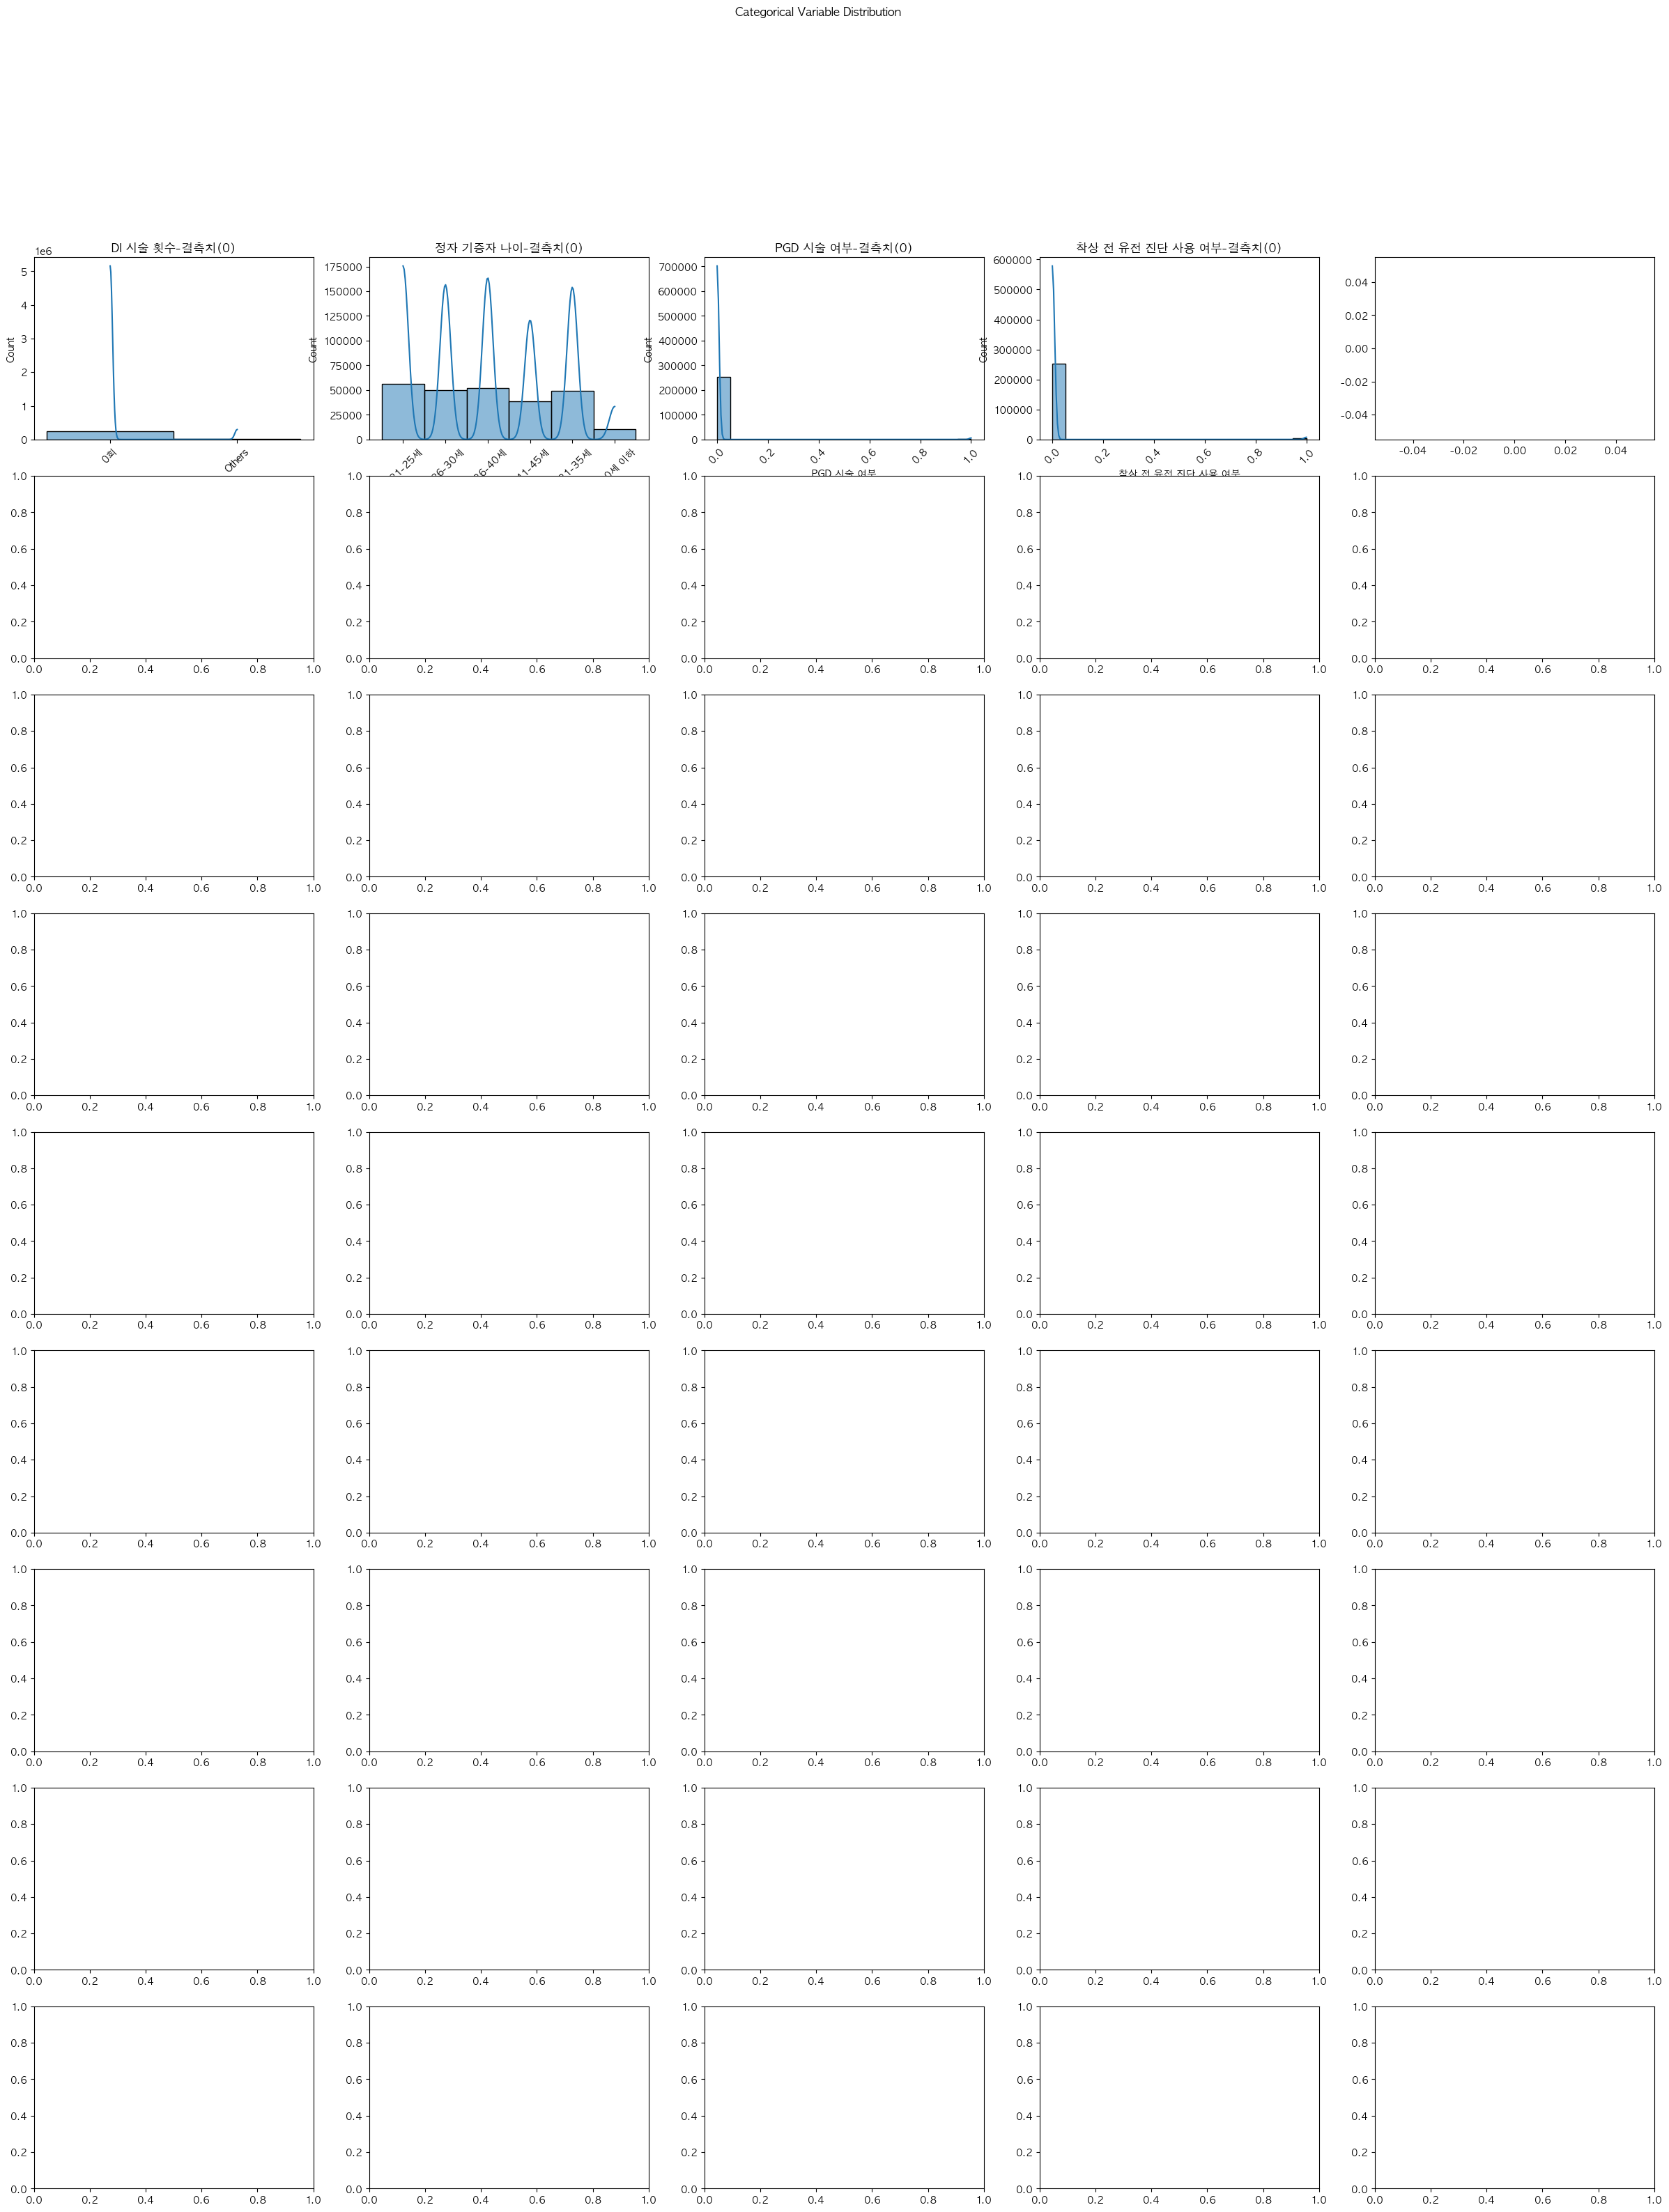

In [63]:
cat_col_len = len(new_cat_cols)
cols = 5
rows = (cat_col_len // cols) + (cat_col_len % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(30, 4*rows))
fig.suptitle('Categorical Variable Distribution')

for i, col in enumerate(new_cat_cols):
    r, c = divmod(i, cols)  # 현재 플롯 위치 계산
    sns.histplot(train[col], kde=True, ax=axes[r, c])  # 히스토그램 플롯
    axes[r, c].set_title(f'{col}-결측치({train[col].isnull().sum()})')  # 제목 추가
    axes[r, c].tick_params(axis='x', rotation=45)

# 빈 서브플롯 숨기기
for i in range(cat_col_len, rows * cols):
    r, c = divmod(i, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

### Categorical Encoding

In [109]:
from sklearn.preprocessing import  OrdinalEncoder

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_encoded = train.copy()
x_train_encoded[new_cat_cols] = ordinal_encoder.fit_transform(train[new_cat_cols])

x_test_encoded = test.copy()
x_test_encoded[new_cat_cols] = ordinal_encoder.transform(test[new_cat_cols])

In [110]:
x_test_encoded.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일
0,5.0000,1.0000,NaN,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,8.0000,0.0000,8.0000,8.0000,0.0000,1.0000,2.0000,3.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,NaN,NaN
1,1.0000,0.0000,NaN,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,3.0000,4.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,NaN,NaN
2,0.0000,3.0000,NaN,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,9.0000,5.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,9.0000,0.0000,9.0000,9.0000,0.0000,1.0000,2.0000,3.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,3.0000,NaN
3,2.0000,3.0000,NaN,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,2.0000,2.0000,0.0000,1.0000,2.0000,0.0000,3.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,2.0000,NaN
4,2.0000,1.0000,NaN,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,10.0000,10.0000,2.0000,2.0000,7.0000,7.0000,0.0000,0.0000,10.0000,0.0000,10.0000,10.0000,0.0000,1.0000,2.0000,3.0000,3.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,5.0000,NaN


In [111]:
print(train.isnull().sum().values.sum(), x_train_encoded.isnull().sum().values.sum())

960741 960741


### Numerical 변수 전처리(결측치 처리)

In [112]:
def num_preprocessing(df, pregnant_dist):
# 특정 값으로 결측치 채우기
    df["이식된 배아 수"] = df["이식된 배아 수"].fillna(2)
    df["배아 이식 경과일"] = df["배아 이식 경과일"].fillna(5)

    # 전체 분포 기반으로 결측치 랜덤 채우기
    df.loc[df["임신 시도 또는 마지막 임신 경과 연수"].isnull(), "임신 시도 또는 마지막 임신 경과 연수"] = np.random.choice(
                                                                                                            pregnant_dist.index,  # 실제 train 데이터에서 등장한 값들
                                                                                                            size=df["임신 시도 또는 마지막 임신 경과 연수"].isnull().sum(),  # NaN 개수만큼 샘플링
                                                                                                            replace=True,
                                                                                                            p=pregnant_dist.values  # 실제 데이터의 분포 기반으로 샘플링 확률 적용
                                                                                                        )
    drop_numeric_columns = ["난자 채취 경과일", "난자 해동 경과일", "배아 해동 경과일"]
    df.drop(columns=drop_numeric_columns, inplace=True)

    df.fillna(0, inplace=True) # cat 변수 결측치는 이미 위에서 처리 완료, 남은 수치형 값들의 null값을 0으로 채움 (0이 최빈값인 경우들이다.)

    return df

In [113]:
print(f'Null value in Numeric')
print(f'Train : {x_train_encoded[numeric_columns].isnull().sum()}')
print(f'Test : {x_test_encoded[numeric_columns].isnull().sum()}')

Null value in Numeric
Train : 임신 시도 또는 마지막 임신 경과 연수    246981
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: int64
Test : 임신 시도 또는 마지막 임신 경과 연수    86770
총 생성 배아 수                 2176
미세주입된 난자 수                2176
미세주입에서 생성된 배아 수           2176
이식된 배아 수                  2176
미세주입 배아 이식 수              2176
저장된 배아 수                  2176
미세주입 후 저장된 배아 수           2176
해동된 배아 수                  2176
해동 난자 수                   2176


In [114]:
pregnant_dist = x_train_encoded["임신 시도 또는 마지막 임신 경과 연수"].dropna().value_counts(normalize=True)
x_train_encoded = num_preprocessing(x_train_encoded, pregnant_dist)
x_test_encoded = num_preprocessing(x_test_encoded, pregnant_dist)

In [115]:
drop_numeric_columns = ["난자 채취 경과일", "난자 해동 경과일", "배아 해동 경과일"]
new_num_cols = set(numeric_columns) - set(drop_numeric_columns)
new_num_cols = list(new_num_cols)

In [116]:
print(f'Train 전체 결측치 : {x_train_encoded.isnull().sum().values.sum()}')
print(f'Test 전체 결측치 : {x_test_encoded.isnull().sum().values.sum()}')

Train 전체 결측치 : 0
Test 전체 결측치 : 0


In [117]:
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  float64
 1   시술 당시 나이               256351 non-null  float64
 2   임신 시도 또는 마지막 임신 경과 연수  256351 non-null  float64
 3   시술 유형                  256351 non-null  float64
 4   특정 시술 유형               256351 non-null  float64
 5   배란 자극 여부               256351 non-null  float64
 6   배란 유도 유형               256351 non-null  float64
 7   단일 배아 이식 여부            256351 non-null  float64
 8   착상 전 유전 검사 사용 여부       256351 non-null  float64
 9   착상 전 유전 진단 사용 여부       256351 non-null  float64
 10  남성 주 불임 원인             256351 non-null  float64
 11  남성 부 불임 원인             256351 non-null  float64
 12  여성 주 불임 원인             256351 non-null  float64
 13  여성 부 불임 원인             256351 non-null  float64
 14  부부 주 불임 원인             256351 non-nu

### 파생 변수 생성

In [118]:
def safe_divide(numerator, denominator):
    return np.where(denominator == 0, 0, numerator / denominator).astype(float) * 100

def derived_feat(train, test):
    train["전체 시술 임신 성공률"] = safe_divide(train["총 임신 횟수"], train["총 시술 횟수"])
    test["전체 시술 임신 성공률"] = safe_divide(test["총 임신 횟수"], test["총 시술 횟수"])

    train["전체 시술 출산 성공률"] = safe_divide(train["총 출산 횟수"], train["총 시술 횟수"])
    test["전체 시술 출산 성공률"] = safe_divide(test["총 출산 횟수"], test["총 시술 횟수"])

    train["배아 이식 대비 임신률"] = safe_divide(train["총 임신 횟수"], train["이식된 배아 수"])
    test["배아 이식 대비 임신률"] = safe_divide(test["총 임신 횟수"], test["이식된 배아 수"])

    train["배아 활용률"] = safe_divide(train["저장된 배아 수"] + train["해동된 배아 수"], train["총 생성 배아 수"])
    test["배아 활용률"] = safe_divide(test["저장된 배아 수"] + test["해동된 배아 수"], test["총 생성 배아 수"])

    train["IVF 임신 성공률"] = safe_divide(train["IVF 임신 횟수"], train["IVF 시술 횟수"])
    test["IVF 임신 성공률"] = safe_divide(test["IVF 임신 횟수"], test["IVF 시술 횟수"])

    train["IVF 출산 성공률"] = safe_divide(train["IVF 출산 횟수"], train["IVF 시술 횟수"])
    test["IVF 출산 성공률"] = safe_divide(test["IVF 출산 횟수"], test["IVF 시술 횟수"])

    train["DI 임신 성공률"] = safe_divide(train["DI 임신 횟수"], train["DI 시술 횟수"])
    test["DI 임신 성공률"] = safe_divide(test["DI 임신 횟수"], test["DI 시술 횟수"])

    train["DI 출산 성공률"] = safe_divide(train["DI 출산 횟수"], train["DI 시술 횟수"])
    test["DI 출산 성공률"] = safe_divide(test["DI 출산 횟수"], test["DI 시술 횟수"])

    train["미세주입 배아 생성률"] = safe_divide(train["미세주입에서 생성된 배아 수"], train["미세주입된 난자 수"])
    test["미세주입 배아 생성률"] = safe_divide(test["미세주입에서 생성된 배아 수"], test["미세주입된 난자 수"])

    train["미세주입 배아 이식률"] = safe_divide(train["미세주입 배아 이식 수"], train["미세주입에서 생성된 배아 수"])
    test["미세주입 배아 이식률"] = safe_divide(test["미세주입 배아 이식 수"], test["미세주입에서 생성된 배아 수"])

    train["해동 비율"] = safe_divide(train["해동된 배아 수"], train["해동 난자 수"])
    test["해동 비율"] = safe_divide(test["해동된 배아 수"], test["해동 난자 수"])

    train["배아 보존 대비 이식 비율"] = safe_divide(train["저장된 배아 수"], train["이식된 배아 수"])
    test["배아 보존 대비 이식 비율"] = safe_divide(test["저장된 배아 수"], test["이식된 배아 수"])
    
    return train, test
    

In [119]:
columns_to_replace = ["전체 시술 임신 성공률", "전체 시술 출산 성공률", "배아 이식 대비 임신률", "배아 활용률", 
                        "IVF 임신 성공률", "IVF 출산 성공률", "DI 임신 성공률", "DI 출산 성공률", 
                        "미세주입 배아 생성률", "미세주입 배아 이식률", "해동 비율", "배아 보존 대비 이식 비율"]
x_train_encoded, x_test_encoded = derived_feat(x_train_encoded, x_test_encoded)
for col in columns_to_replace:
    x_train_encoded[col] = x_train_encoded[col].replace([np.inf, -np.inf], 0)
    x_test_encoded[col] = x_test_encoded[col].replace([np.inf, -np.inf], 0)
    x_train_encoded[col] = x_train_encoded[col].fillna(0)
    x_test_encoded[col] = x_test_encoded[col].fillna(0)

for col in columns_to_replace:
    x_train_encoded[col] = x_train_encoded[col].astype(float).clip(0, 100)
    x_test_encoded[col] = x_test_encoded[col].astype(float).clip(0, 100)

In [120]:
columns_to_drop = [
    "남성 주 불임 원인","남성 부 불임 원인",
    "여성 주 불임 원인","여성 부 불임 원인","부부 주 불임 원인","부부 부 불임 원인",
    "불임 원인 - 자궁경부 문제","불임 원인 - 자궁내막증",
    "DI 임신 횟수","IVF 출산 횟수","DI 출산 횟수","기증자 정자와 혼합된 난자 수","대리모 여부","난자 혼합 경과일",
]

x_train_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)
x_test_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

### 데이터 분할

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
y = x_train_encoded.pop('임신 성공 여부')
# x_train, x_temp, y_train, y_temp = train_test_split(x_train_encoded, y, test_size=0.2, random_state=42)
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# for k-fold
x_train, x_test, y_train, y_test = train_test_split(x_train_encoded, y, test_size=0.1, random_state=42)

In [123]:
print(f'Train : {x_train.shape}, {y_train.shape}')
# print(f'Validation : {x_val.shape}, {y_val.shape}')
print(f'Test : {x_test.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded.shape}')

Train : (230715, 57), (230715,)
Test : (25636, 57), (25636,)
Submission : (90067, 57)


In [124]:
x_train.describe()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,총 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,PGD 시술 여부,PGS 시술 여부,배아 이식 경과일,전체 시술 임신 성공률,전체 시술 출산 성공률,배아 이식 대비 임신률,배아 활용률,IVF 임신 성공률,IVF 출산 성공률,DI 임신 성공률,DI 출산 성공률,미세주입 배아 생성률,미세주입 배아 이식률,해동 비율,배아 보존 대비 이식 비율
count,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000,230715.0000
mean,2.9475,1.2949,9.2760,0.9754,0.6875,0.7709,0.7581,0.2283,0.0106,0.0124,0.2512,0.1387,0.3719,0.1303,0.9119,1.4089,0.9746,1.2986,0.0542,0.1985,0.1873,0.1472,4.9416,4.0697,2.7751,1.3841,0.7068,1.1560,0.5972,0.4439,0.0452,8.3537,0.0897,7.5138,6.9379,0.9381,1.7888,2.2437,2.7482,0.1567,0.8196,0.0096,0.0084,0.0075,3.5508,9.5391,7.0045,12.2725,13.9106,9.2874,6.7999,1.1928,0.9154,32.4242,17.6151,0.0028,24.1334
std,2.0099,1.3828,3.5541,0.1548,0.7377,0.4202,0.4282,0.4197,0.1023,0.1107,0.4337,0.3456,0.4833,0.3366,0.2834,1.4433,1.1125,1.3928,0.2263,0.3989,0.3902,0.3543,4.6740,5.5950,4.0683,0.7682,0.8904,2.4678,1.8156,1.4029,0.6804,7.3501,1.0787,6.4841,6.5497,0.2410,0.6146,0.8040,1.4776,0.3635,0.3845,0.0976,0.0915,0.0862,1.6949,22.9793,20.0603,28.5509,24.9230,23.0194,20.0603,10.8563,9.5239,38.0346,29.0009,0.4913,41.7749
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,0.0000,7.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,2.0000,2.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,3.0000,1.0000,9.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,7.0000,6.0000,1.0000,2.0000,2.0000,3.0000,0.0000,1.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,5.0000,2.0000,11.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,8.0000,7.0000,5.0000,2.0000,2.0000,1.0000,0.0000,0.0000,0.0000,13.0000,0.0000,11.0000,11.0000,1.0000,2.0000,3.0000,4.0000,0.0000,1.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,0.0000,22.2222,0.0000,0.0000,0.0000,0.0000,70.0000,25.0000,0.0000,50.0000
max,6.0000,5.0000,20.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.0000,3.0000,4.0000,1.0000,1.0000,1.0000,1.0000,51.0000,51.0000,42.0000,3.0000,3.0000,51.0000,51.0000,32.0000,36.0000,51.000

# EDA2 ---- NO

### Feature Importance by RF

In [29]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# rf.fit(x_train, y_train)
# preds = rf.predict_proba(x_val)[:, 1]
# score = roc_auc_score(y_val, preds)

# lgbm = LGBMClassifier(random_state=42, n_jobs=-1, n_estimators=500)
# lgbm.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='auc')
# preds = lgbm.predict_proba(x_val)[:, 1]
# score = roc_auc_score(y_val, preds)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 57
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051521
[LightGBM] [Info] Start training from score -1.051521


In [ ]:
# feat_iprt = pd.DataFrame([])
# # feat_iprt['Feature'] = rf.feature_names_in_
# # feat_iprt['Importance'] = rf.feature_importances_
# feat_iprt['Feature'] = lgbm.feature_names_in_
# feat_iprt['Importance'] = lgbm.feature_importances_
# feat_iprt.sort_values(by='Importance', ascending=False, inplace=True)

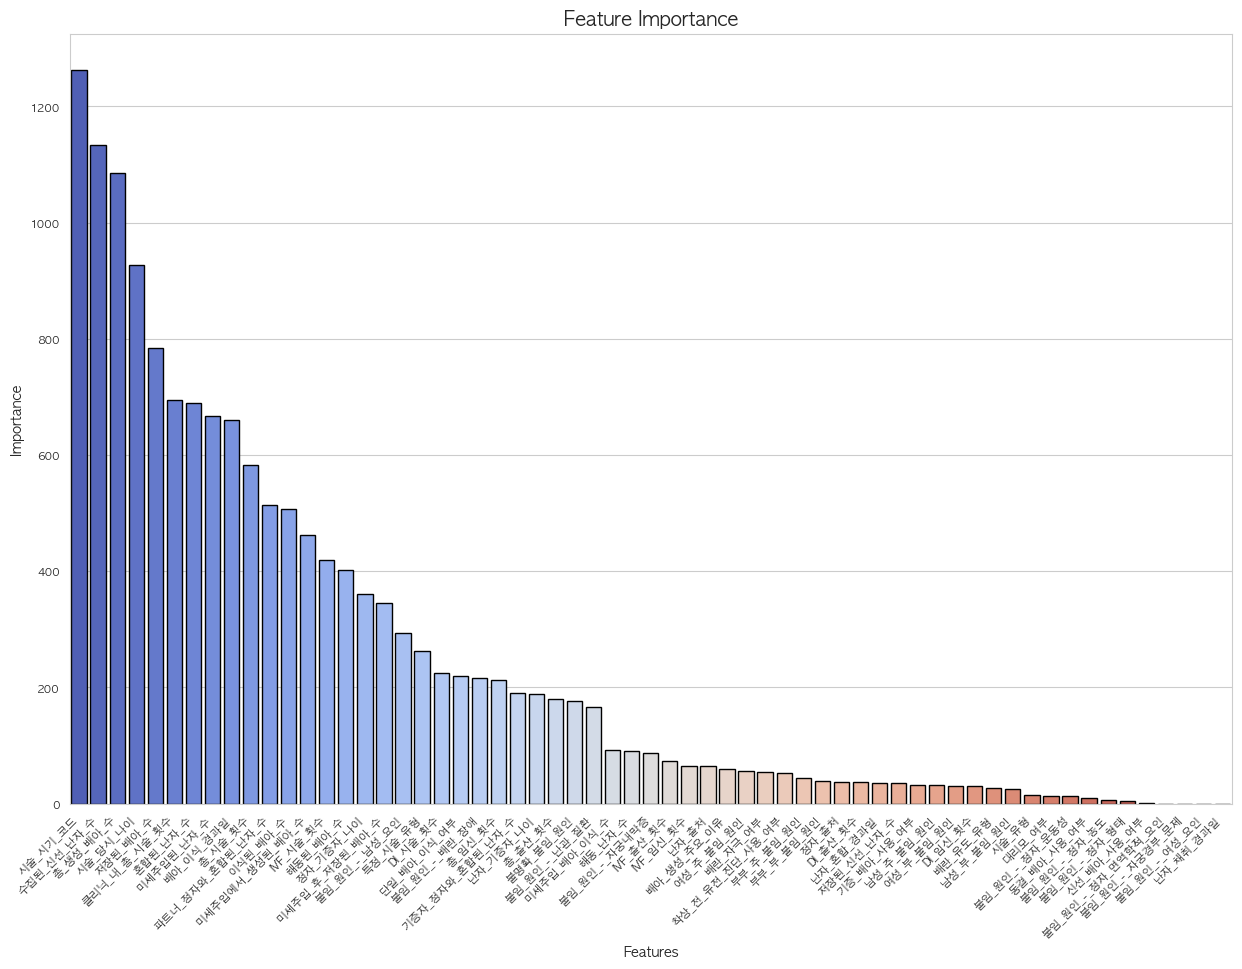

In [ ]:
# plt.figure(figsize=(15, 10))

# sns.set_style("whitegrid")  # 배경을 그리드 스타일로 설정
# sns.set_palette("viridis")  # 색상 팔레트 변경
# plt.rcParams['font.family'] = 'AppleGothic' # Seborn 설정 이후 font 설정 필수

# ax = sns.barplot(feat_iprt, x='Feature', y='Importance', palette="coolwarm", hue='Feature', legend=False)

# # 막대 테두리 스타일 조정
# for bar in ax.patches:
#     bar.set_edgecolor("black")  # 막대 테두리 색상 추가

# plt.xlabel("Features", fontsize = 10)
# plt.xticks(fontsize=8, rotation=45, ha="right")
# plt.yticks(fontsize=8)

# plt.title("Feature Importance", fontsize=14, fontweight="bold")

# plt.show()

In [ ]:
# col_name = '미세주입_배아_이식_수'
# thr = feat_iprt[feat_iprt.Feature == col_name].Importance.values[0]
# print(f'Feature Selection 기준 : {col_name} - {thr}')

Feature Selection 기준 : 미세주입_배아_이식_수 - 92


In [ ]:
# seletected_Feature = feat_iprt[feat_iprt.Importance > thr].Feature.values
# seletected_Feature = [col.replace("_", " ") for col in seletected_Feature]
# print(f'선택된 피쳐 수 : {len(seletected_Feature)}')
# print(f'선택된 피쳐 : {seletected_Feature}')

선택된 피쳐 수 : 28
선택된 피쳐 : ['시술 시기 코드', '수집된 신선 난자 수', '총 생성 배아 수', '시술 당시 나이', '저장된 배아 수', '클리닉 내 총 시술 횟수', '혼합된 난자 수', '미세주입된 난자 수', '배아 이식 경과일', '총 시술 횟수', '파트너 정자와 혼합된 난자 수', '이식된 배아 수', '미세주입에서 생성된 배아 수', 'IVF 시술 횟수', '해동된 배아 수', '정자 기증자 나이', '미세주입 후 저장된 배아 수', '불임 원인 - 남성 요인', '특정 시술 유형', 'DI 시술 횟수', '단일 배아 이식 여부', '불임 원인 - 배란 장애', '총 임신 횟수', '기증자 정자와 혼합된 난자 수', '난자 기증자 나이', '총 출산 횟수', '불명확 불임 원인', '불임 원인 - 난관 질환']


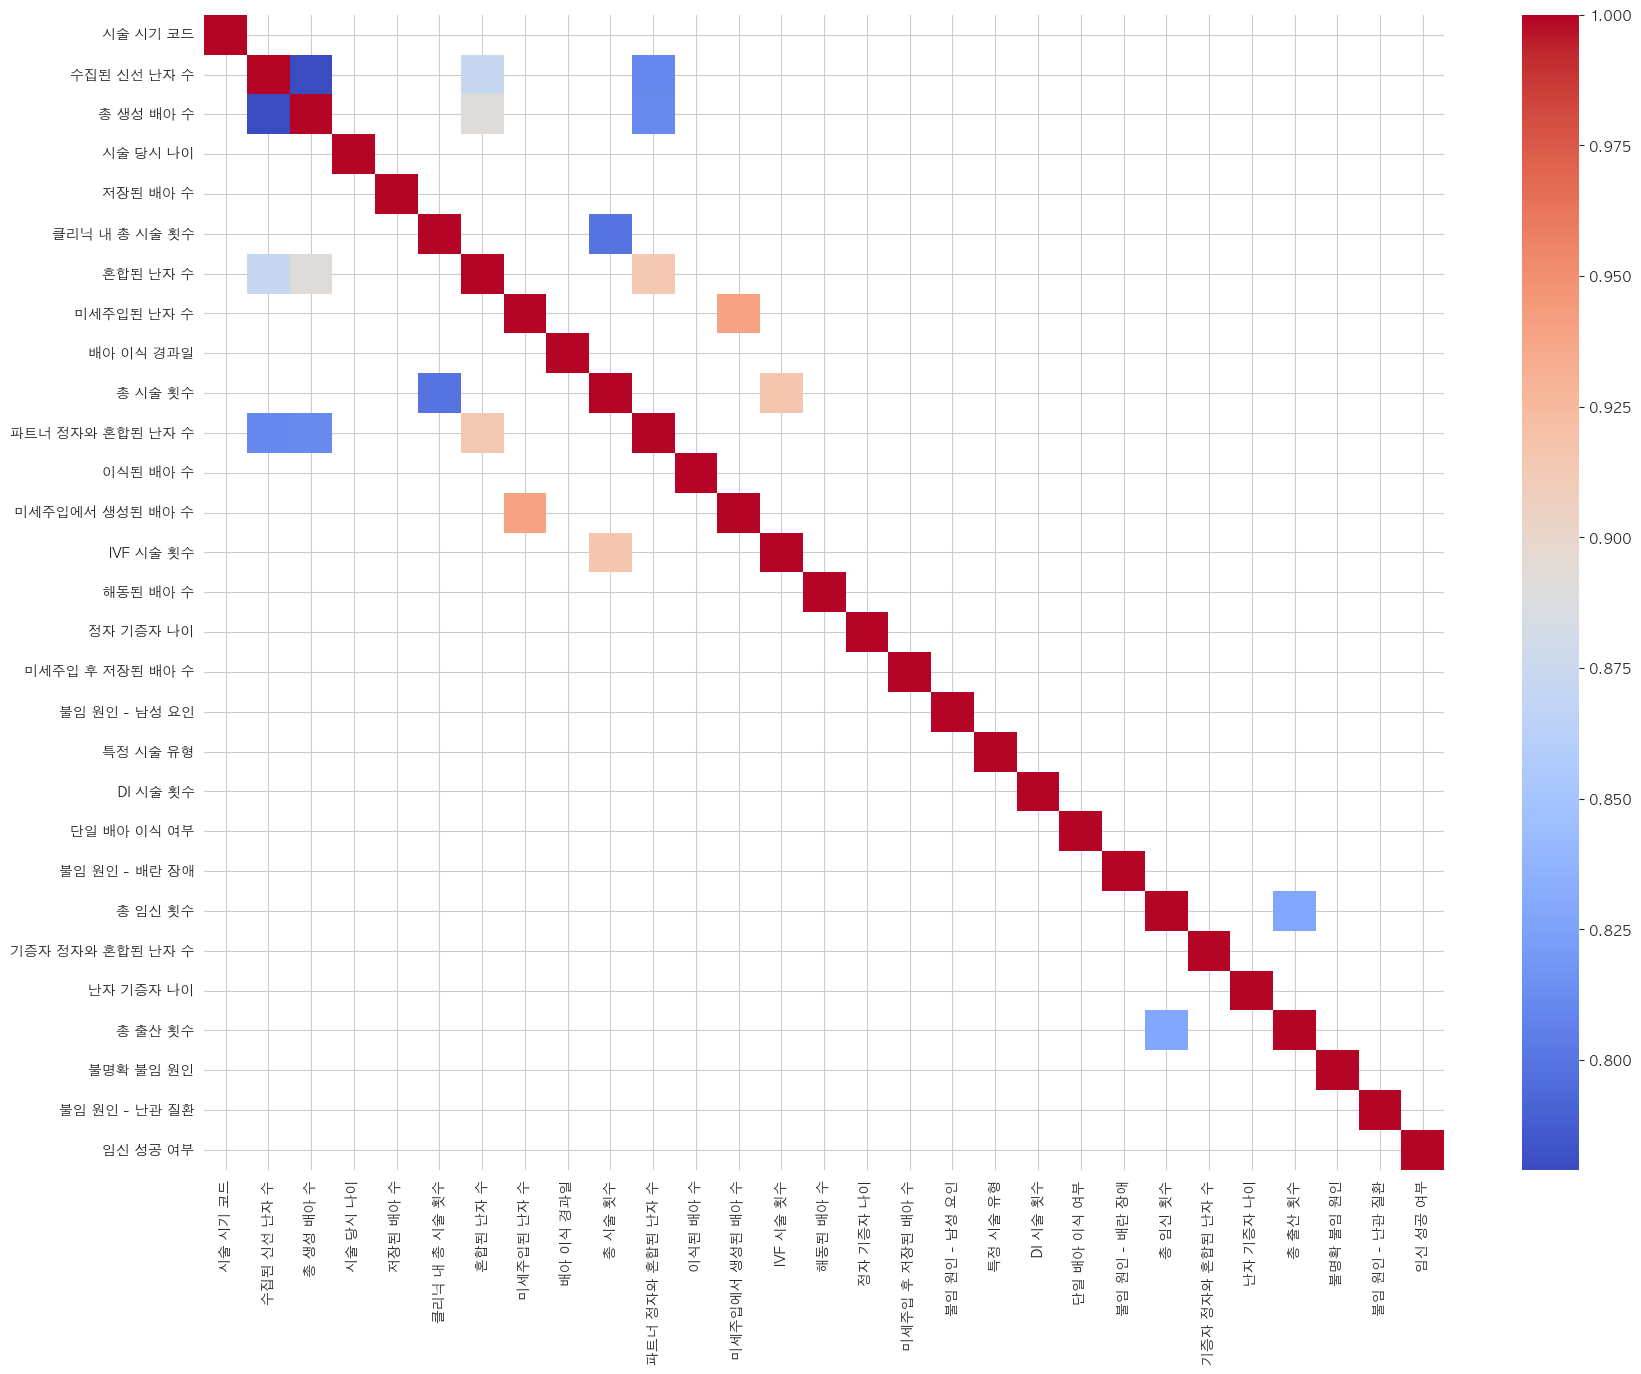

In [ ]:
# data = pd.concat([x_train[seletected_Feature], y_test], axis=1)
# threshold = 0.75
# mask = np.abs(data.corr()) < threshold  # 0.5 미만인 값들을 True로 마스킹

# plt.figure(figsize=(20, 15))
# sns.heatmap(data.corr(), cmap='coolwarm', annot=False, mask=mask)
# plt.show()

In [304]:
# Corr에 기반한 피쳐 제거
# seletected_Feature = set(seletected_Feature) - set(['수집된 신선 난자 수', '총 생성 배아 수', '총 임신 횟수', 'IVF 임신 횟수'])
# print(f'선택된 피쳐 수 : {len(seletected_Feature)}')
# print(f'선택된 피쳐 : {seletected_Feature}')
# seletected_Feature = list(seletected_Feature)

### Feature Selection

In [ ]:
# print(f'Train : {x_train.shape}, {y_train.shape}')
# print(f'Validation : {x_val.shape}, {y_val.shape}')
# print(f'Test : {x_test.shape}, {y_test.shape}')
# print(f'Submission : {x_test_encoded.shape}')

Train : (205080, 61), (205080,)
Validation : (25635, 61), (25635,)
Test : (25636, 61), (25636,)
Submission : (90067, 61)


In [ ]:
# x_train_selected = x_train[seletected_Feature]
# x_val_selected = x_val[seletected_Feature]
# x_test_selected = x_test[seletected_Feature]
# x_test_encoded_selected = x_test_encoded[seletected_Feature]

In [ ]:
# print(f'Train : {x_train_selected.shape}, {y_train.shape}')
# print(f'Validation : {x_val_selected.shape}, {y_val.shape}')
# print(f'Test : {x_test_selected.shape}, {y_test.shape}')
# print(f'Submission : {x_test_encoded_selected.shape}')

Train : (205080, 28), (205080,)
Validation : (25635, 28), (25635,)
Test : (25636, 28), (25636,)
Submission : (90067, 28)


### PCA(Num)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [57]:
# 수치형 변수
numeric_columns_non_null = set(numeric_columns) - set(over_20k_cols)
numeric_columns_non_null = list(numeric_columns_non_null)
print(f'결측치가 없는 수치형 변수 ({len(numeric_columns_non_null)}) : {numeric_columns_non_null}')

결측치가 없는 수치형 변수 (17) : ['저장된 신선 난자 수', '난자 채취 경과일', '미세주입 배아 이식 수', '미세주입된 난자 수', '기증자 정자와 혼합된 난자 수', '해동 난자 수', '총 생성 배아 수', '난자 혼합 경과일', '이식된 배아 수', '미세주입 후 저장된 배아 수', '배아 이식 경과일', '해동된 배아 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '미세주입에서 생성된 배아 수', '저장된 배아 수', '수집된 신선 난자 수']


In [83]:
# PCA이후 Null값을 방지하기 위함
scaler = MinMaxScaler()
scaler.fit(x_train[numeric_columns_non_null])
x_train_scaled = scaler.transform(x_train[numeric_columns_non_null])
x_val_scaled = scaler.transform(x_val[numeric_columns_non_null])
x_test_scaled = scaler.transform(x_test[numeric_columns_non_null])
x_test_encoded_scaled = scaler.transform(x_test_encoded[numeric_columns_non_null])

In [107]:
pca = PCA(n_components=6) # 95% 이상의 분산을 설명하는 최소한의 차원을 선택하기
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)
x_test_pca = pca.transform(x_test_scaled)
x_test_encoded_pca = pca.transform(x_test_encoded_scaled)

In [108]:
print(np.isnan(x_train_pca).sum())  # NaN 개수 확인
print(np.isinf(x_train_pca).sum())  # inf 개수 확인.

0
0


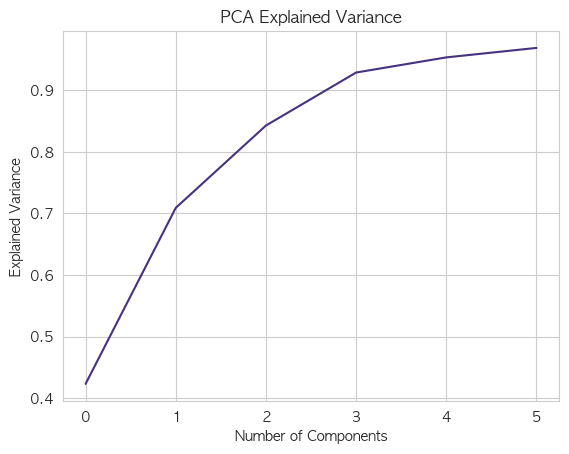

In [109]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [110]:
x_train_pca = pd.DataFrame(x_train_pca)
display(x_train_pca.describe())
x_train_pca.isnull().sum()

,0,1,2,3,4,5
count,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,0.3524,0.2897,0.1981,0.1590,0.0850,0.0672
min,-0.5960,-0.8326,-0.3409,-1.4128,-0.6055,-0.5791
25%,-0.2697,-0.2061,-0.1223,-0.1076,-0.0501,-0.0216
50%,-0.0789,0.0111,-0.0688,0.0141,-0.0041,-0.0126
75%,0.2789,0.1972,0.1433,0.1157,0.0477,-0.0022
max,1.3573,1.6560,0.8053,0.6154,0.9834,1.1684


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [111]:
scaler = MinMaxScaler()
x_train_pca = scaler.fit_transform(x_train_pca)
x_val_pca = scaler.transform(x_val_pca)
x_test_pca = scaler.transform(x_test_pca)
x_test_encoded_pca = scaler.transform(x_test_encoded_pca)

In [112]:
x_train_pca = pd.DataFrame(x_train_pca)
display(x_train_pca.describe())
x_train_pca.isnull().sum()

,0,1,2,3,4,5
count,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000
mean,0.3051,0.3346,0.2974,0.6966,0.3811,0.3314
std,0.1804,0.1164,0.1729,0.0784,0.0535,0.0384
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1671,0.2518,0.1908,0.6436,0.3496,0.3190
50%,0.2648,0.3390,0.2375,0.7035,0.3785,0.3242
75%,0.4479,0.4138,0.4224,0.7536,0.4111,0.3301
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [113]:
print(f'Train : {x_train_pca.shape}, {y_train.shape}')
print(f'Validation : {x_val_pca.shape}, {y_val.shape}')
print(f'Test : {x_test_pca.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded_pca.shape}')

Train : (205080, 6), (205080,)
Validation : (25635, 6), (25635,)
Test : (25636, 6), (25636,)
Submission : (90067, 6)


### PCA(Cat)

In [114]:
# 결측치가 없는 범주형 변수
cat_cols_non_null = set(categorical_columns) - set(over_20k_cols)
cat_cols_non_null = list(cat_cols_non_null)
print(f'결측치가 없는 범주형 변수 ({len(cat_cols_non_null)}) : {cat_cols_non_null}')

결측치가 없는 범주형 변수 (44) : ['배란 자극 여부', '정자 기증자 나이', '남성 부 불임 원인', '불임 원인 - 자궁경부 문제', '총 시술 횟수', 'DI 출산 횟수', '불임 원인 - 난관 질환', '불임 원인 - 정자 형태', 'DI 임신 횟수', '난자 출처', '남성 주 불임 원인', '착상 전 유전 진단 사용 여부', '대리모 여부', '여성 주 불임 원인', '불임 원인 - 정자 면역학적 요인', '부부 부 불임 원인', '불임 원인 - 정자 농도', '기증 배아 사용 여부', '불임 원인 - 여성 요인', 'IVF 출산 횟수', '총 출산 횟수', '부부 주 불임 원인', '불임 원인 - 배란 장애', '난자 기증자 나이', '클리닉 내 총 시술 횟수', '총 임신 횟수', '정자 출처', '시술 유형', '여성 부 불임 원인', '동결 배아 사용 여부', 'IVF 시술 횟수', '불임 원인 - 남성 요인', '단일 배아 이식 여부', 'IVF 임신 횟수', '불명확 불임 원인', '불임 원인 - 자궁내막증', '불임 원인 - 정자 운동성', '시술 시기 코드', '특정 시술 유형', 'DI 시술 횟수', '배란 유도 유형', '신선 배아 사용 여부', '시술 당시 나이', '배아 생성 주요 이유']


In [115]:
x_train_cat = x_train[cat_cols_non_null]
x_val_cat = x_val[cat_cols_non_null]
x_test_cat = x_test[cat_cols_non_null]
x_test_encoded_cat = x_test_encoded[cat_cols_non_null]

pca2 = PCA(n_components=6) # 95% 이상의 분산을 설명하는 최소한의 차원을 선택하기
pca2.fit(x_train_cat)
x_train_cat_pca = pca2.transform(x_train_cat)
x_val_cat_pca = pca2.transform(x_val_cat)
x_test_cat_pca = pca2.transform(x_test_cat)
x_test_encoded_cat_pca = pca2.transform(x_test_encoded_cat)

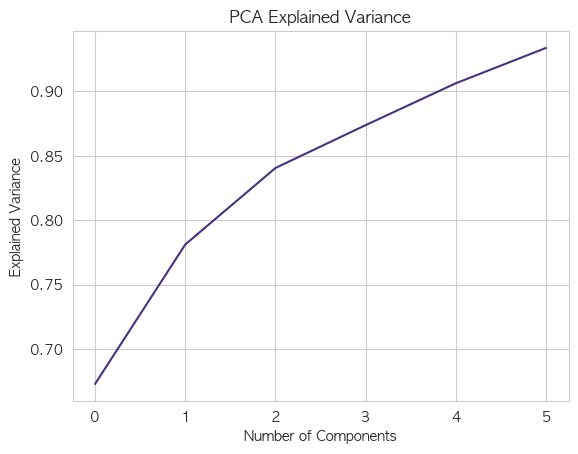

In [116]:
explained_variance = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [117]:
scaler2 = MinMaxScaler()
x_train_cat_pca = scaler2.fit_transform(x_train_cat_pca)
x_val_cat_pca = scaler2.transform(x_val_cat_pca)
x_test_cat_pca = scaler2.transform(x_test_cat_pca)
x_test_encoded_cat_pca = scaler2.transform(x_test_encoded_cat_pca)

In [118]:
x_train_cat_pca = pd.DataFrame(x_train_cat_pca)
display(x_train_cat_pca.describe())
x_train_cat_pca.isnull().sum()

,0,1,2,3,4,5
count,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000
mean,0.4374,0.2832,0.5639,0.6590,0.8268,0.3526
std,0.2811,0.1910,0.2654,0.0909,0.1116,0.1191
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1652,0.1405,0.3161,0.6377,0.8408,0.2642
50%,0.5664,0.2428,0.5744,0.6610,0.8613,0.3296
75%,0.6212,0.3907,0.8272,0.6817,0.8801,0.4268
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [119]:
x_train_pca.shape, x_train_cat_pca.shape

((205080, 6), (205080, 6))

In [120]:
# 축소된 수치형 변수 + 범주형 변수

# 변수 종류별 임의의 컬럼명 만들기
num_cols_count = x_train_pca.shape[1]  # 수치형 변수 개수
cat_cols_count = x_train_cat_pca.shape[1]  # 범주형 변수 개수

num_col_names = [f"num_{i}" for i in range(num_cols_count)]
cat_col_names = [f"cat_{i}" for i in range(cat_cols_count)]

# numerical
x_train_pca = pd.DataFrame(x_train_pca).reset_index(drop=True)
x_train_pca.columns = num_col_names

x_val_pca = pd.DataFrame(x_val_pca).reset_index(drop=True)
x_val_pca.columns = num_col_names

x_test_pca = pd.DataFrame(x_test_pca).reset_index(drop=True)
x_test_pca.columns = num_col_names

x_test_encoded_pca = pd.DataFrame(x_test_encoded_pca).reset_index(drop=True)
x_test_encoded_pca.columns = num_col_names

# categorical
x_train_cat_pca = pd.DataFrame(x_train_cat_pca).reset_index(drop=True)
x_train_cat_pca.columns = cat_col_names

x_val_cat_pca = pd.DataFrame(x_val_cat_pca).reset_index(drop=True)
x_val_cat_pca.columns = cat_col_names

x_test_cat_pca = pd.DataFrame(x_test_cat_pca).reset_index(drop=True)
x_test_cat_pca.columns = cat_col_names

x_test_encoded_cat_pca = pd.DataFrame(x_test_encoded_cat_pca).reset_index(drop=True)
x_test_encoded_cat_pca.columns = cat_col_names

x_train_pca = pd.concat([x_train_pca, x_train_cat_pca], axis=1)
x_val_pca = pd.concat([x_val_pca, x_val_cat_pca], axis=1)
x_test_pca = pd.concat([x_test_pca, x_test_cat_pca], axis=1)
x_test_encoded_pca = pd.concat([x_test_encoded_pca, x_test_encoded_cat_pca], axis=1)

In [121]:
display(x_train_pca.describe())
x_train_pca.head()

,num_0,num_1,num_2,num_3,num_4,num_5,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5
count,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000,205080.0000
mean,0.3051,0.3346,0.2974,0.6966,0.3811,0.3314,0.4374,0.2832,0.5639,0.6590,0.8268,0.3526
std,0.1804,0.1164,0.1729,0.0784,0.0535,0.0384,0.2811,0.1910,0.2654,0.0909,0.1116,0.1191
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1671,0.2518,0.1908,0.6436,0.3496,0.3190,0.1652,0.1405,0.3161,0.6377,0.8408,0.2642
50%,0.2648,0.3390,0.2375,0.7035,0.3785,0.3242,0.5664,0.2428,0.5744,0.6610,0.8613,0.3296
75%,0.4479,0.4138,0.4224,0.7536,0.4111,0.3301,0.6212,0.3907,0.8272,0.6817,0.8801,0.4268
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,num_0,num_1,num_2,num_3,num_4,num_5,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5
0,0.4785,0.1612,0.1629,0.5336,0.3039,0.3603,0.1594,0.1626,0.4370,0.6926,0.8524,0.4329
1,0.1848,0.3899,0.3660,0.8387,0.4022,0.4007,0.6139,0.0874,0.8174,0.7764,0.6326,0.2196
2,0.0487,0.3279,0.0682,0.7860,0.3802,0.3185,0.9611,0.1949,0.8347,0.6959,0.8677,0.5252
3,0.1216,0.2560,0.2732,0.7127,0.3992,0.3243,0.6287,0.2161,0.1739,0.7168,0.8906,0.5328
4,0.0495,0.3295,0.0672,0.7863,0.3758,0.3200,0.6292,0.4073,0.8408,0.7014,0.7258,0.3025


In [122]:
print(f'Train : {x_train_pca.shape}, {y_train.shape}')
print(f'Validation : {x_val_pca.shape}, {y_val.shape}')
print(f'Test : {x_test_pca.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded_pca.shape}')

Train : (205080, 12), (205080,)
Validation : (25635, 12), (25635,)
Test : (25636, 12), (25636,)
Submission : (90067, 12)


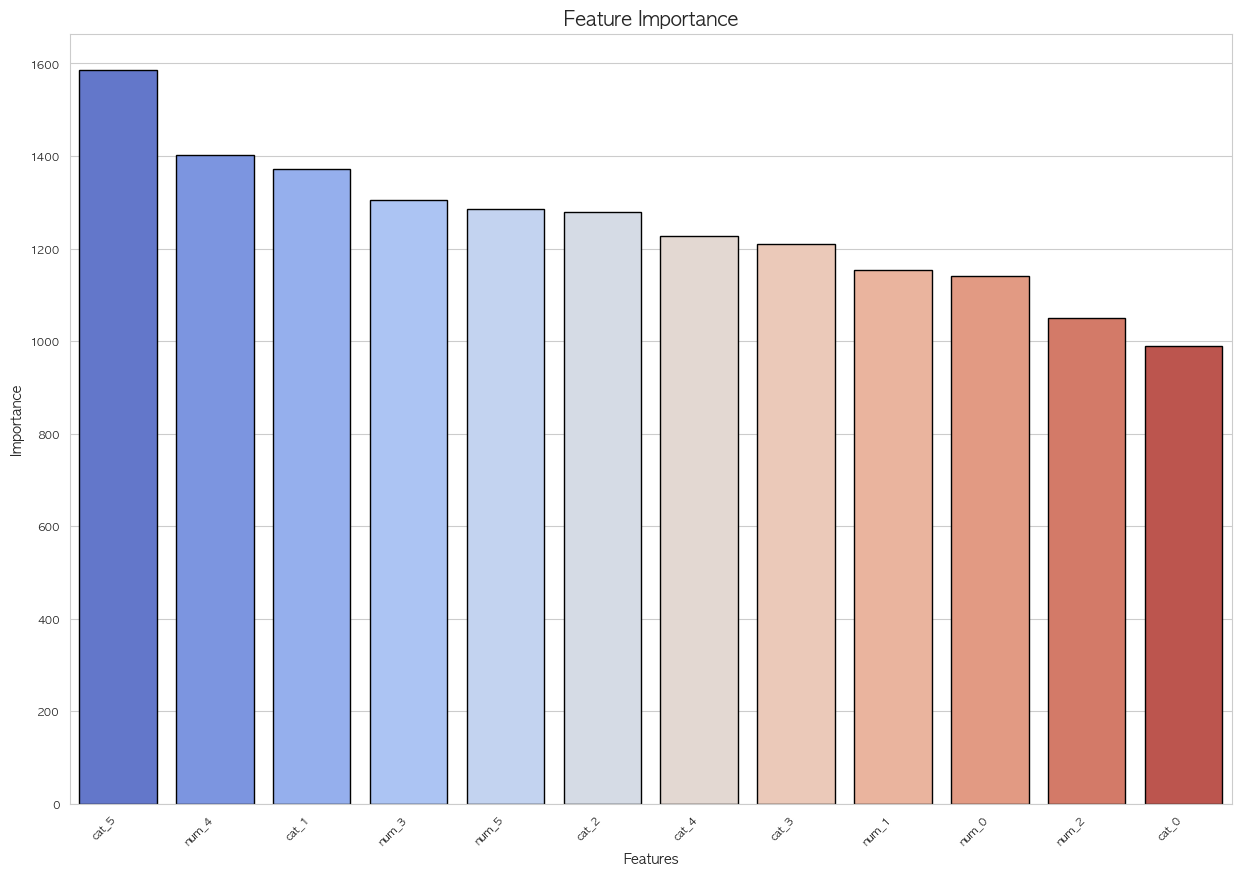

In [123]:
lgbm = LGBMClassifier(random_state=42, n_jobs=-1, n_estimators=500)
lgbm.fit(x_train_pca, y_train, eval_set=[(x_val_pca, y_val)], eval_metric='auc')
preds = lgbm.predict_proba(x_val_pca)[:, 1]
score = roc_auc_score(y_val, preds)

plt.figure(figsize=(15, 10))

sns.set_style("whitegrid")  # 배경을 그리드 스타일로 설정
sns.set_palette("viridis")  # 색상 팔레트 변경
plt.rcParams['font.family'] = 'AppleGothic' # Seborn 설정 이후 font 설정 필수

feat_iprt = pd.DataFrame([])
feat_iprt['Feature'] = lgbm.feature_names_in_
feat_iprt['Importance'] = lgbm.feature_importances_
feat_iprt.sort_values(by='Importance', ascending=False, inplace=True)

ax = sns.barplot(feat_iprt, x='Feature', y='Importance', palette="coolwarm", hue='Feature', legend=False)

# 막대 테두리 스타일 조정
for bar in ax.patches:
    bar.set_edgecolor("black")  # 막대 테두리 색상 추가

plt.xlabel("Features", fontsize = 10)
plt.xticks(fontsize=8, rotation=45, ha="right")
plt.yticks(fontsize=8)

plt.title("Feature Importance", fontsize=14, fontweight="bold")

plt.show()

# Train

In [125]:
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
import optuna

In [126]:
from scipy.special import expit
def custom_auc(y_true, y_pred):
    """LightGBM의 eval_metric을 위한 커스텀 AUC 함수"""
    y_pred = expit(y_pred)  # Sigmoid 변환 (0~1 범위로 조정)
    return "auc", roc_auc_score(y_true, y_pred), True

In [131]:
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 80),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'verbose' : -1,
        'early_stopping_rounds': 50,
        'n_jobs': -1
    }

    # model = LGBMClassifier(**param)
    # model.fit(x_train_selected, y_train, 
    #           eval_set=[(x_val_selected, y_val)], 
    #           eval_metric='auc',
    #           )
    # preds = model.predict_proba(x_val_selected)[:, 1]
    # return roc_auc_score(y_val, preds)
    # model = LGBMClassifier(**param)
    # model.fit(x_train_pca, y_train, 
    #           eval_set=[(x_val_pca, y_val)], 
    #           eval_metric='auc',
    #           )
    # preds = model.predict_proba(x_val_pca)[:, 1]
    # return roc_auc_score(y_val, preds)
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(x_train, y_train):
        x_train_fold, x_val_fold = x_train.iloc[train_idx], x_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = LGBMRegressor(**param)
        model.fit(x_train_fold, y_train_fold, 
                eval_set=[(x_val_fold, y_val_fold)], 
                eval_metric='custom_auc', # sigmoid 변환
                )
        # preds = model.predict_proba(x_val)[:, 1]
        preds = model.predict(x_val_fold)
        preds = expit(preds) # sigmoid 변환
        auc_score = roc_auc_score(y_val_fold, preds)
        scores.append(auc_score)
    return np.mean(scores)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

print("Best hyperparameters:", study.best_params)

[I 2025-02-17 16:28:41,453] A new study created in memory with name: no-name-e62fb0d8-f61c-489d-bdb3-931f3a2e0b46
[I 2025-02-17 16:28:49,552] Trial 0 finished with value: 0.7385554062783921 and parameters: {'max_depth': 7, 'learning_rate': 0.061872648145699975, 'n_estimators': 460, 'num_leaves': 58, 'subsample': 0.6858779913665106, 'colsample_bytree': 0.7624144619445659}. Best is trial 0 with value: 0.7385554062783921.
[I 2025-02-17 16:28:54,942] Trial 1 finished with value: 0.7375510654912466 and parameters: {'max_depth': 7, 'learning_rate': 0.1752404972323749, 'n_estimators': 477, 'num_leaves': 64, 'subsample': 0.5184208061782082, 'colsample_bytree': 0.8833820066541078}. Best is trial 0 with value: 0.7385554062783921.
[I 2025-02-17 16:29:09,232] Trial 2 finished with value: 0.7377259307999573 and parameters: {'max_depth': 8, 'learning_rate': 0.01298041122713843, 'n_estimators': 364, 'num_leaves': 22, 'subsample': 0.653827213002233, 'colsample_bytree': 0.7399595477440798}. Best is tri

Best hyperparameters: {'max_depth': 7, 'learning_rate': 0.061872648145699975, 'n_estimators': 460, 'num_leaves': 58, 'subsample': 0.6858779913665106, 'colsample_bytree': 0.7624144619445659}


In [132]:
best_params = study.best_params
model = LGBMRegressor(**best_params)
# best_param을 가져오는 것이기에 eval_set이 필요 없음
model.fit(x_train, y_train)

LGBMRegressor(colsample_bytree=0.7624144619445659,
              learning_rate=0.061872648145699975, max_depth=7, n_estimators=460,
              num_leaves=58, subsample=0.6858779913665106)

# Inference

In [133]:
# predict_proba_train = model.predict_proba(x_train_selected)
# predict_proba_val = model.predict_proba(x_val_selected)
# predict_proba_test = model.predict_proba(x_test_selected)

# predict_proba_train = model.predict_proba(x_train_pca)
# predict_proba_val = model.predict_proba(x_val_pca)
# predict_proba_test = model.predict_proba(x_test_pca)

# predict_proba_train = model.predict_proba(x_train)
# predict_proba_val = model.predict_proba(x_val)
# predict_proba_test = model.predict_proba(x_test)

### Regressor
predict_train = model.predict(x_train)
predict_train = expit(predict_train) # sigmoid 변환

# predict_val = model.predict(x_val)
# predict_val = expit(predict_val) # sigmoid 변환

predict_test = model.predict(x_test)
predict_test = expit(predict_test) # sigmoid 변환

In [134]:
# print(f'Train AUC : {roc_auc_score(y_train, predict_proba_train[:, 1])}')
# print(f'Validation AUC : {roc_auc_score(y_val, predict_proba_val[:, 1])}')
# print(f'Test AUC : {roc_auc_score(y_test, predict_proba_test[:, 1])}')

### Regressor
print(f'Train AUC : {roc_auc_score(y_train, predict_train)}')
# print(f'Validation AUC : {roc_auc_score(y_val, predict_val)}')
print(f'Test AUC : {roc_auc_score(y_test, predict_test)}')

Train AUC : 0.7775355398135824
Test AUC : 0.7394271637653221


LGBMClassifier(colsample_bytree=0.7965858042239695, early_stopping_rounds=50,  
                learning_rate=0.13167504038242184, max_depth=7, metric='auc',  
                n_estimators=504, n_jobs=-1, objective='binary',  
                subsample=0.9431219407440812, verbosity=-1)  
                
Train AUC : 0.7518993355373851  
Validation AUC : 0.737219485079001  
Test AUC : 0.7403759798863631  


#### Feature preprocessing + LGBMRegressor

LGBMRegressor(colsample_bytree=0.9446753565898952, early_stopping_rounds=50,  
              learning_rate=0.11416879142236457, max_depth=6, metric='auc',  
              n_estimators=342, n_jobs=-1, num_leaves=49, objective='binary',  
              subsample=0.6632319162838908, verbosity=-1)  
  
Train AUC : 0.7525851161749361  
Validation AUC : 0.7369734791009783  
Test AUC : 0.7412015162688934  

# Submission Prediction

In [135]:
# pred_proba = model.predict_proba(x_test_encoded)[:, 1]
# submission = pd.read_csv(file_path + 'Data/sample_submission.csv')
# submission['probability'] = pred_proba

### Regressor
pred = model.predict(x_test_encoded)
pred = expit(pred) # sigmoid 변환
submission = pd.read_csv(file_path + 'Data/sample_submission.csv')
submission['probability'] = pred

submission.to_csv(file_path + 'Data/submission.csv', index=False)